# 1. Introduction 
- Statistic model (mô hình thống kê) là mô hình toán học đại diện cho các khía cạnh của thế giới thực, nó có thể đơn giản nhưng đôi khi cũng vô cùng phức tạp 


In [20]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 
import pandas as pd 


# 2. General Linear Models 
- Một mô hình thống kê là một tập các phương trình liên quan tới giá trị  dự đoán (biến độc lập) và các quan sát (biến phụ thuộc)
- Kí hiệu trong mô hình thống kê và tuyến tính : 
<table>
  <thead>
    <tr>
      <th>LinAlg</th>
      <th>Stats</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
  <tr>
    <td>Ax = b</td>
    <td>X $$\beta$$ = y </td>
    <td>Mô hình tuyến tính</td>
  </tr>
  <tr>
    <td>A</td>
    <td>X</td>
    <td>Ma trận chứa input</td>
  </tr>
  <tr>
    <td>x</td>
    <td>$$\beta$$</td>
    <td>Ma trận hệ số</td>
  </tr>
  <tr>
    <td>b</td>
    <td>y</td>
    <td>Ma trận dự đoán</td>
  </tr>
  
  </tbody>
</table>

## Xây dựng mô hình GLM 
- Để xây dựng GLM người ta có các bước sau : 
    1. Xác định phương trình liên quan giữa biến độc lập và biến phụ thuộc 
    2. Chiếu các dữ liệu quan sát vào phương trình 
    3. Chuyển đổi chuỗi phương trình thành ma trận 
    4. Giải hệ phương trình đó 

- Ví dụ ta có bài toán dự đoán chiều cao dựa trên cân nặng và chiều cao của bố mẹ khi đó ta có y là biến phụ thuộc và các biến độc lập : $\beta_{1}$ là chiều cao của bố mẹ,  $\beta_{2}$ là cân nặng, $\beta_{0}$ là hằng số, $\epsilon$ là sai số : $$ y = \beta_{0} + \beta_{1}w + \beta_{2}h + \epsilon $$

- Ta thực hiện mapping dữ liệu và chuyển hệ số trên thành ma trận và tính hệ số dựa vào ma trận 

In [2]:
y = np.random.randint(low = 160, high = 180, size=(4, 1))
w = np.random.randint(low = 60, high = 90, size =(4, 1))
h = np.random.randint(low = 160, high = 180, size =(4, 1) )

A = np.concatenate([np.ones((4, 1)),  w, h], axis = 1) 


In [3]:
A

array([[  1.,  88., 167.],
       [  1.,  66., 161.],
       [  1.,  74., 163.],
       [  1.,  67., 170.]])

In [4]:
y

array([[167],
       [167],
       [173],
       [175]])

=> Nhiệm vụ của ta là giải hệ phương trình Ax = y như trên để tìm ra hệ số x

## Solving GLMs 
- Để giải hệ phương trình trên, ta thực hiện khử X tại phía trái như sau : 
$$ Ax = y \\ (A^TA)^{-1}(A^TA)x =  (A^TA)^{-1}A^Ty \\ x = (A^TA)^{-1}A^Ty $$

In [5]:
x = np.linalg.inv(A.T@A)@A.T@y
print(x)

[[84.84057167]
 [-0.22048009]
 [ 0.61676148]]


=> Phương trình cuối cùng trên được gọi là dạng least-square 
- Tuy nhiên, có một câu hỏi được đặt ra là liệu ta có luôn luôn giải hệ phương trình trên được hay không ?. Câu trả lời là không, điều kiện để giải được hệ phương trình trên đó là ma trận y phải nằm trong không gian cột của X (trên thực tế điều này thường không xảy ra)
- Nếu y trong columns space của A, điều này của nghĩa là mô hình đã capture lại 100% variance, điều này trên thực tế là không xảy ra do còn chứa những phần nhiễu ($\epsilon$).  
=> Do đó, người ta thường viết mô hình tuyến tính như sau : $$ Ax =  \hat{y}  \\ \hat{y} = y + \epsilon $$
=> Từ đó có thể thấy, mục tiêu của mô hình tuyến tính là tìm các hệ số x sao cho giá trị dự đoán (regressor) gần nhất với dữ liệu quan sát 

## Góc nhìn hình học trong Least Squares 
- Về góc nhìn hình học, ta chỉ cần đưa ra 2 khẳng định : 
    1. Liệu vector y (giá trị dự đoán) có nằm trong columns space của ma trận A hay không ? => Phần trên đã trả lời là không 
    2. Vậy vector nào nằm trong columns space gần nhất với vector y ? => hình chiếu của vector y xuống columns space của A, nhiệm vụ của ta là đi tìm các hệ số x sao cho vector $ \hat{y} $ là hình chiếu của y xuống columns space của A 
    

- Gọi $ Ax $ là hình chiếu của vector y lên trên columns space của A. Khi đó ta có: $$ A^T (y - Ax)  = 0 \\ A^T y - A^TAx  = 0 \\ x = (A^TA)^{-1}A^Ty $$  

In [21]:
import plotly.graph_objects as go


# Tạo vector
vector = np.array([1, 2, 3])

# Tạo vector pháp tuyến cho mặt phẳng (ví dụ: phương trình mặt phẳng x + y + z = 0)
normal_vector = np.array([1, 1, 1])

# Tính toán hình chiếu của vector lên mặt phẳng
projection = vector - np.dot(vector, normal_vector) / np.dot(normal_vector, normal_vector) * normal_vector

# Tạo mặt phẳng
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
zz = -(normal_vector[0]*xx + normal_vector[1]*yy) / normal_vector[2]

# Tạo dữ liệu cho plotly
data = [
    go.Scatter3d(x=[0, vector[0]], y=[0, vector[1]], z=[0, vector[2]], name="Original Vector"),
    go.Scatter3d(x=[0, projection[0]], y=[0, projection[1]], z=[0, projection[2]], name="Projected Vector"),
    go.Surface(x=xx, y=yy, z=zz, opacity=0.5, colorscale='blues', showscale=False)
]

# Tạo layout cho plot
layout = go.Layout(scene=dict(
                    xaxis=dict(title='X'),
                    yaxis=dict(title='Y'),
                    zaxis=dict(title='Z')))

# Tạo figure và vẽ
fig = go.Figure(data=data, layout=layout)
fig.show()


## Góc nhìn giải tích trong Least Square 
- Mục tiêu của việc xây dựng mô hình đó là giảm thiểu sai số nhất có thể (đã để cập ở trên). Tuy nhiên sai số có thể âm hoặc dương do đó, ta có từ "square" để chỉ bình phương của sai số. Khi đó thực chất bài toán trở thành bài toán tối ưu:  $$ \min _{x} || Ax - y ||^2 $$ 
- Dưới góc nhìn giải tích, ta có thể sử dụng đạo hàm để tìm điểm cực tiểu của hàm số trên và kết  quả cũng dẫn tới solution như trên : $$ 2A^T(Ax - y) = 0  \\ A^TAx = A^Ty \\ x = (A^TA)^{-1}A^Ty $$

# 3. Ví dụ về GLM 

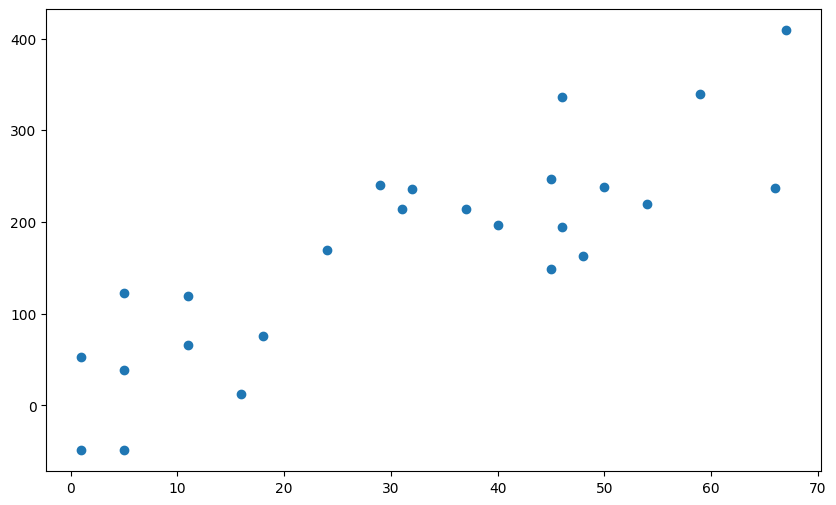

In [41]:
# fake data 

def fake_func(x): 
    return 5 * x + 7 +  np.random.randint(low=-100, high = 100, size = 1)

x = np.random.randint(low = 1, high = 70, size = (25, 1))
y = np.array([fake_func(i) for i in list(x)])

fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(x, y)


plt.show()

- Sử dụng close form ở trên, ta có thể tính được giá trị của tham số x trong phương trình trên và fit mô hình ta có :

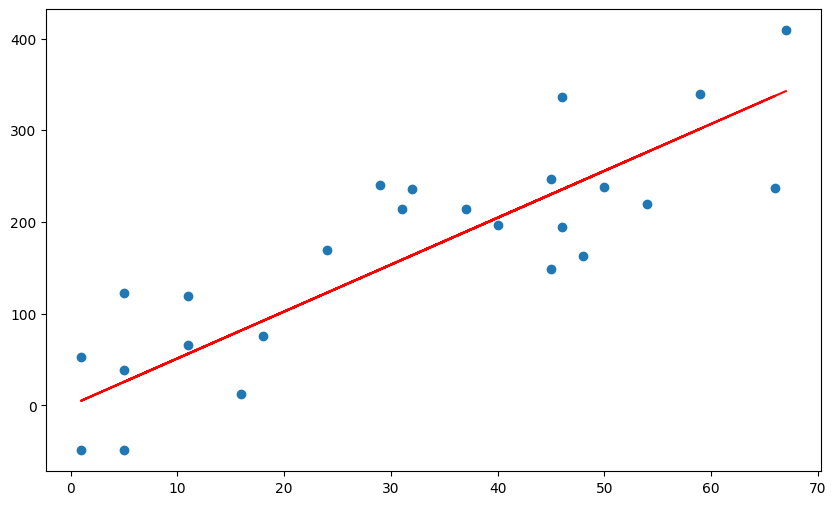

In [42]:
beta = np.linalg.inv(x.T @ x) @ x.T @ y 

y_hat =  x @ beta
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(x, y)
ax.plot(x, y_hat, color = 'r')

plt.show()

In [43]:
mse = 0 
for i in range(len(y_hat)) : 
    mse += (y[i] - y_hat[i]) ** 2 

print(f'MSE: {mse}')

MSE: [93892.98143154]


- Xét thêm hằng số cho phương trình : $ y = ax + b $ :

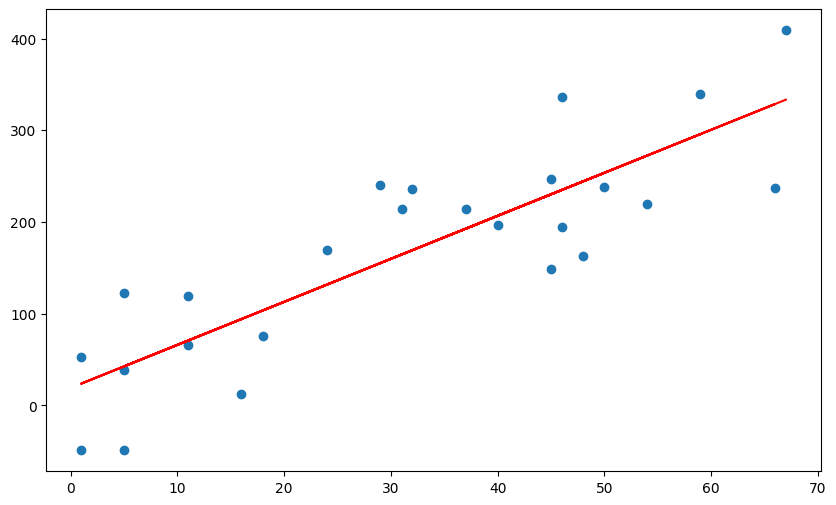

In [45]:
X = np.hstack((np.ones((25, 1)), x))

beta = np.linalg.inv(X.T @ X) @ X.T @ y 

y_hat =  X @ beta
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X[:, 1], y)
ax.plot(X[:, 1], y_hat, color = 'r')

plt.show()


In [46]:
mse = 0 
for i in range(len(y_hat)) : 
    mse += (y[i] - y_hat[i]) ** 2 

print(f'MSE: {mse}')

MSE: [91222.36115743]


# 4. Least Squares thông qua QR 
- Việc tính toán ma trận nghịch đảo trực tiếp có thể gây ra sai số, người ta có thể sử dụng phép tách QR phục vụ cho việc tính Least square. 
- Ta có thể áp dụng như sau : $$ Ax = y \\ QRx = y \\ Rx = Q^Ty \\ x = R^{-1}Q^Ty $$
- Sử dụng QR sẽ không cần tính $ X^TX$ và ma trận nghịch đảo 